# **0. Import Libraries & Setup**

In [206]:
pip install kneed

In [207]:
# Data handling
import pandas as pd
import numpy as np
from datetime import datetime
import math

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import matplotlib.cm as cm
from cycler import cycler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Clustering evaluation
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples
)

# Statistics
from scipy.stats import (
    f_oneway,
    chi2_contingency,
    ttest_ind,
    pearsonr
)

# Dimensionality reduction
from sklearn.decomposition import PCA

# Hierarchical clustering utilities
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Nearest neighbors
from sklearn.neighbors import NearestNeighbors

# Utilities
from kneed import KneeLocator

In [208]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 3)

In [210]:
!mkdir -p /usr/share/fonts/truetype/poppins
!wget -q https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Regular.ttf -P /usr/share/fonts/truetype/poppins/
!wget -q https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Bold.ttf -P /usr/share/fonts/truetype/poppins/
!wget -q https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Italic.ttf -P /usr/share/fonts/truetype/poppins/

font_dir = '/usr/share/fonts/truetype/poppins'
for font_file in fm.findSystemFonts(fontpaths=[font_dir]):
    fm.fontManager.addfont(font_file)

In [211]:
palette = ['#006dec', '#ffcb30', '#FCF8DD', '#808080', '#BFBFBF']
plt.rcParams['font.family'] = 'Poppins'

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
plt.rcParams['axes.prop_cycle'] = cycler(color=palette)
plt.rcParams['text.color'] = '#808080'
plt.rcParams['axes.labelcolor'] = '#808080'
plt.rcParams['axes.titlecolor'] = '#808080'
plt.rcParams['xtick.labelcolor'] = '#808080'
plt.rcParams['ytick.labelcolor'] = '#808080'

plt.rcParams['xtick.color'] = '#BFBFBF'
plt.rcParams['ytick.color'] = '#BFBFBF'
plt.rcParams['axes.edgecolor'] = '#BFBFBF'
plt.rcParams['grid.color'] = '#BFBFBF'

sns.set_palette(palette)

# **1. Data Loading**

In [212]:
df = pd.read_csv('marketing_campaign_data.csv')
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (2240, 30)


In [213]:
# Get the head of the dataframe
print("First 5 rows of the dataframe:")
display(df.head())

First 5 rows of the dataframe:


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,5.814e+07,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,4.634e+07,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,7.161e+07,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,2.665e+07,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,5.829e+07,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [214]:
# Get the information about the dataframe
print("Information about the dataframe:")
print(df.info())

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGo

In [215]:
# Get the summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
df.describe()


Summary statistics of the dataframe:


,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2240.000,2.216e+03,2240.000,2240.000,2240.000,2.240e+03,2240.000,2.240e+03,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.0,2240.0,2240.000
mean,1119.500,5592.160,1968.806,5.225e+07,0.444,0.506,49.109,3.039e+05,26302.232,1.670e+05,37525.446,27062.946,44021.875,2.325,4.085,2.662,5.790,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.0,11.0,0.149
std,646.777,3246.662,11.984,2.517e+07,0.538,0.545,28.962,3.366e+05,39773.434,2.257e+05,54628.979,41280.498,52167.439,1.932,2.779,2.923,3.251,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.0,0.0,0.356
min,0.000,0.000,1893.000,1.730e+06,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
25%,559.750,2828.250,1959.000,3.530e+07,0.000,0.000,24.000,2.375e+04,1000.000,1.600e+04,3000.000,1000.000,9000.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
50%,1119.500,5458.500,1970.000,5.138e+07,0.000,0.000,49.000,1.735e+05,8000.000,6.700e+04,12000.000,8000.000,24000.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
75%,1679.250,8427.750,1977.000,6.852e+07,1.000,1.000,74.000,5.042e+05,33000.000,2.320e+05,50000.000,33000.000,56000.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
max,2239.000,11191.000,1996.000,6.667e+08,2.000,2.000,99.000,1.493e+06,199000.000,1.725e+06,259000.000,263000.000,362000.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.0,11.0,1.000


# **2. Exploratory Data Analysis**

## **2.0. Data Overview & Summary Statistics**

In [216]:
df_plot = df.copy()

In [217]:
def to_k(x):
    return f'{int(round(x/1000, 0))}K'

In [218]:
# Define column groups: numerical, categorical, date, and nominal
num_cols = ["Year_Birth","Income","Recency","Kidhome","Teenhome","Dt_Customer","MntCoke","MntFruits","MntMeatProducts", "MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases", "NumWebVisitsMonth"]
cat_cols = ["Education","Marital_Status","AcceptedCmp1","AcceptedCmp2", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","Complain", "Z_CostContact","Z_Revenue"]
dat_cols = ["Dt_Customer"]

nominal_cols = ["Education","Marital_Status", "Recency_Category", "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response","Complain","Z_CostContact","Z_Revenue","Has_Children","Primary_Category", "Preferred_Channel","Income_Category","Age_Group"]

In [219]:
# Summary statistics for numerical and date columns
display(df_plot[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1.969e+03,1.198e+01,1.893e+03,1.959e+03,1.970e+03,1.977e+03,1.996e+03
Income,2216.0,5.225e+07,2.517e+07,1.730e+06,3.530e+07,5.138e+07,6.852e+07,6.667e+08
Recency,2240.0,4.911e+01,2.896e+01,0.000e+00,2.400e+01,4.900e+01,7.400e+01,9.900e+01
Kidhome,2240.0,4.442e-01,5.384e-01,0.000e+00,0.000e+00,0.000e+00,1.000e+00,2.000e+00
Teenhome,2240.0,5.062e-01,5.445e-01,0.000e+00,0.000e+00,0.000e+00,1.000e+00,2.000e+00
MntCoke,2240.0,3.039e+05,3.366e+05,0.000e+00,2.375e+04,1.735e+05,5.042e+05,1.493e+06
MntFruits,2240.0,2.630e+04,3.977e+04,0.000e+00,1.000e+03,8.000e+03,3.300e+04,1.990e+05
MntMeatProducts,2240.0,1.670e+05,2.257e+05,0.000e+00,1.600e+04,6.700e+04,2.320e+05,1.725e+06
MntFishProducts,2240.0,3.753e+04,5.463e+04,0.000e+00,3.000e+03,1.200e+04,5.000e+04,2.590e+05
MntSweetProducts,2240.0,2.706e+04,4.128e+04,0.000e+00,1.000e+03,8.000e+03,3.300e+04,2.630e+05


In [220]:
# Summary statistics for categorical columns
display(df_plot[cat_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
AcceptedCmp1,2240.0,0.064,0.245,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2240.0,0.013,0.115,0.0,0.0,0.0,0.0,1.0
AcceptedCmp3,2240.0,0.073,0.260,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2240.0,0.075,0.263,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2240.0,0.073,0.260,0.0,0.0,0.0,0.0,1.0
Response,2240.0,0.149,0.356,0.0,0.0,0.0,0.0,1.0
Complain,2240.0,0.009,0.096,0.0,0.0,0.0,0.0,1.0
Z_CostContact,2240.0,3.000,0.000,3.0,3.0,3.0,3.0,3.0
Z_Revenue,2240.0,11.000,0.000,11.0,11.0,11.0,11.0,11.0


## **2.1. Demographic Analysis**

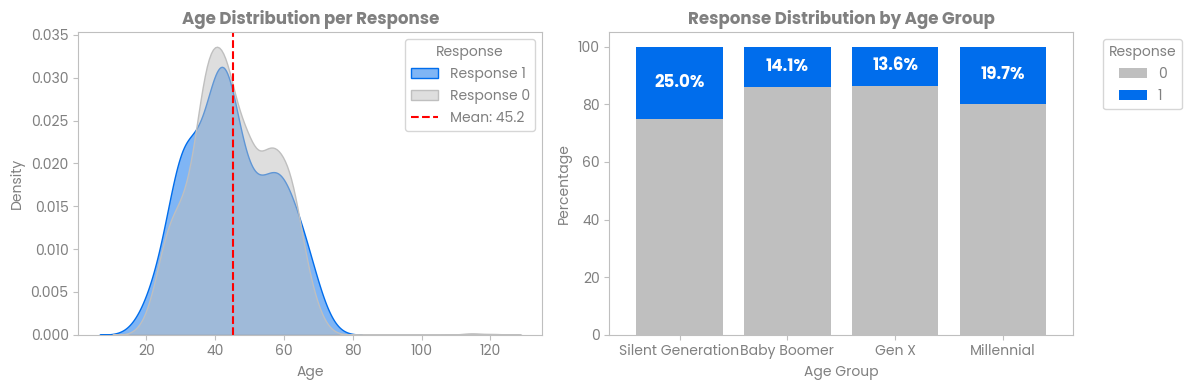

In [221]:
# Convert Dt_Customer to datetime & calculate Age
df_plot["Dt_Customer"] = pd.to_datetime(df_plot["Dt_Customer"], format="%d-%m-%Y")
ref_year = df_plot["Dt_Customer"].dt.year.max()
df_plot["Age"] = ref_year - df_plot["Year_Birth"]

bins = [1928, 1946, 1965, 1981, 1997]
labels = ['Silent Generation', 'Baby Boomer', 'Gen X', 'Millennial']
df_plot['Age_Group'] = pd.cut(df_plot['Year_Birth'], bins=bins, labels=labels, right=False)

# Calculate response distribution
response_dist = pd.crosstab(df_plot['Age_Group'], df_plot['Response'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = ['#006DEC', '#BFBFBF']

# KDE plot per Response
for i, response in enumerate(df_plot['Response'].unique()):
    sns.kdeplot(data=df_plot[df_plot['Response'] == response], x='Age', fill=True, alpha=0.5, ax=axes[0], label=f'Response {response}', color=colors[i])

axes[0].set_title('Age Distribution per Response', fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
axes[0].axvline(df_plot['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df_plot["Age"].mean():.1f}')
axes[0].legend(title='Response')

# 100% stacked bar chart
ax = axes[1]
bars = response_dist.plot(kind='bar', stacked=True, ax=ax, width=0.8, color=['#BFBFBF', '#006DEC'])
ax.set_title('Response Distribution by Age Group', fontweight='bold')
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')
ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for c in ax.containers[-1:]:
    ax.bar_label(c, labels=[f"{v.get_height():.1f}%" if v.get_height() > 0 else "" for v in c], label_type="center", color="white", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

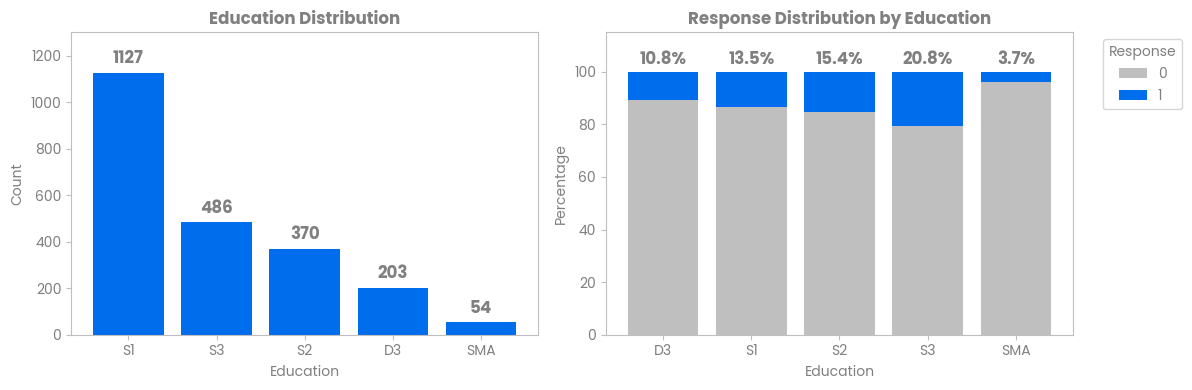

In [222]:
education_counts = df_plot['Education'].value_counts()

edu_response = pd.crosstab(df_plot['Education'], df_plot['Response'])
edu_response_percent = edu_response.div(edu_response.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Education Distribution
bars_left = education_counts.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Education Distribution', fontweight='bold')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_ylim(0, 1300)

for c in axes[0].containers:
    axes[0].bar_label(
        c,
        labels=[f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in c],
        label_type="edge",
        color="#808080",
        fontsize=12,
        fontweight="bold",
        padding=3
    )

# Bar Chart Education vs Response
response_dist = pd.crosstab(df_plot['Education'], df_plot['Response'], normalize='index') * 100
ax = axes[1]
bars = response_dist.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8,
    color=['#BFBFBF', '#006DEC']
)
ax.set_title('Response Distribution by Education', fontweight='bold')
ax.set_xlabel('Education')
ax.set_ylabel('Percentage')
ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0, 115)

for c in ax.containers[-1:]:
    ax.bar_label(
        c,
        labels=[f"{v.get_height():.1f}%" if v.get_height() > 0 else "" for v in c],
        label_type="edge",
        padding=2,
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

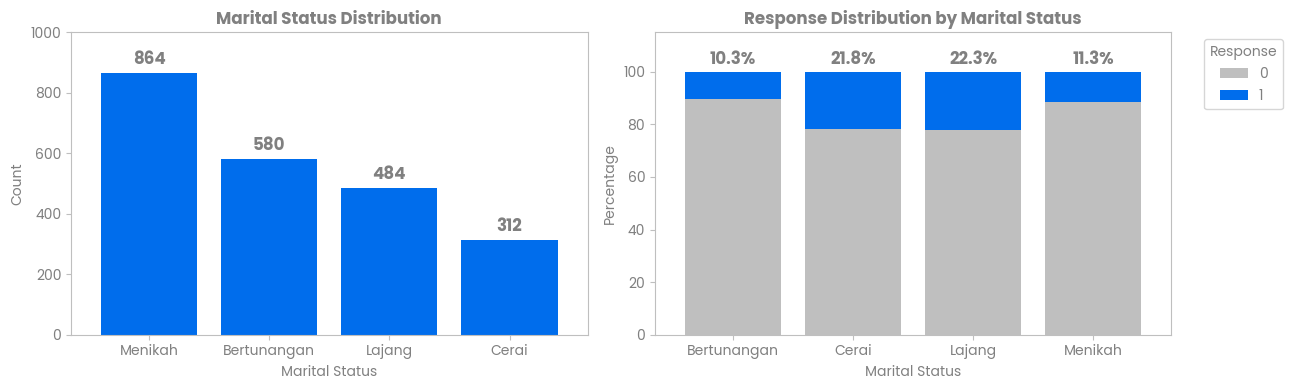

In [223]:
df_plot["Marital_Status"] = df_plot["Marital_Status"].replace({"Duda": "Cerai", "Janda": "Cerai"})
marital_counts = df_plot['Marital_Status'].value_counts()

marital_response = pd.crosstab(df_plot['Marital_Status'], df_plot['Response'])
marital_response_percent = marital_response.div(marital_response.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Marital Status Distribution
bars_left = marital_counts.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Marital Status Distribution', fontweight='bold')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_ylim(0, 1000)

for c in axes[0].containers:
    axes[0].bar_label(
        c,
        labels=[f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in c],
        label_type="edge",
        color="#808080",
        fontsize=12,
        fontweight="bold",
        padding=3
    )

# Bar Chart Marital Status vs Response
response_dist = pd.crosstab(df_plot['Marital_Status'], df_plot['Response'], normalize='index') * 100
ax = axes[1]
bars = response_dist.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8,
    color=['#BFBFBF', '#006DEC']
)
ax.set_title('Response Distribution by Marital Status', fontweight='bold')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage')
ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0, 115)

for c in ax.containers[-1:]:
    ax.bar_label(
        c,
        labels=[f"{v.get_height():.1f}%" if v.get_height() > 0 else "" for v in c],
        label_type="edge",
        padding=2,
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

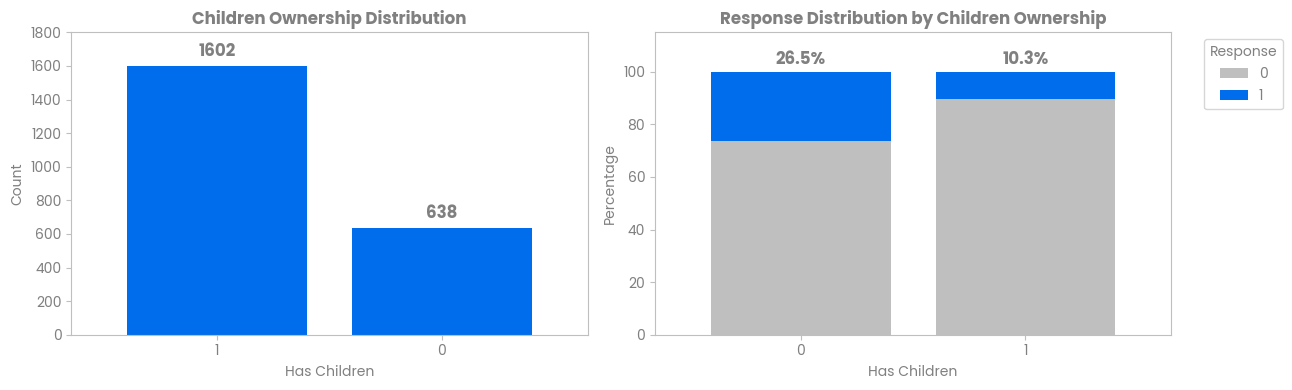

In [224]:
df_plot['HasChildren'] = ((df_plot['Kidhome'] + df_plot['Teenhome']) > 0).astype(int)
children_counts = df_plot['HasChildren'].value_counts()

children_response = pd.crosstab(df_plot['HasChildren'], df_plot['Response'])
children_response_percent = children_response.div(children_response.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# HasChildren Distribution
bars_left = children_counts.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Children Ownership Distribution', fontweight='bold')
axes[0].set_xlabel('Has Children')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_ylim(0, 1800)

for c in axes[0].containers:
    axes[0].bar_label(
        c,
        labels=[f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in c],
        label_type="edge",
        color="#808080",
        fontsize=12,
        fontweight="bold",
        padding=3
    )

# Bar Chart HasChildren vs Response
response_dist = pd.crosstab(df_plot['HasChildren'], df_plot['Response'], normalize='index') * 100
ax = axes[1]
bars = response_dist.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8,
    color=['#BFBFBF', '#006DEC']
)
ax.set_title('Response Distribution by Children Ownership', fontweight='bold')
ax.set_xlabel('Has Children')
ax.set_ylabel('Percentage')
ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0, 115)

for c in ax.containers[-1:]:
    ax.bar_label(
        c,
        labels=[f"{v.get_height():.1f}%" if v.get_height() > 0 else "" for v in c],
        label_type="edge",
        padding=2,
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

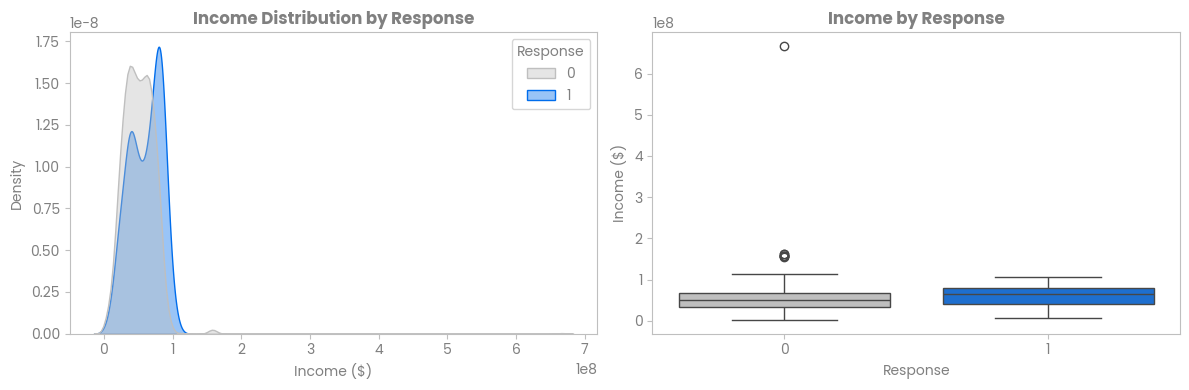

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# KDE plot
sns.kdeplot(data=df, x="Income", hue="Response", common_norm=False, fill=True, alpha=0.4, ax=axes[0], palette=['#BFBFBF', '#006DEC'])
axes[0].set_title("Income Distribution by Response", fontweight='bold')
axes[0].set_xlabel("Income ($)")
axes[0].set_ylabel("Density")

# Boxplot per Response
sns.boxplot(data=df, x="Response", y="Income", ax=axes[1], palette=['#BFBFBF', '#006DEC'])
axes[1].set_title("Income by Response", fontweight='bold')
axes[1].set_xlabel("Response")
axes[1].set_ylabel("Income ($)")

plt.tight_layout()
plt.show()

## **2.2. Product Spending Analysis**

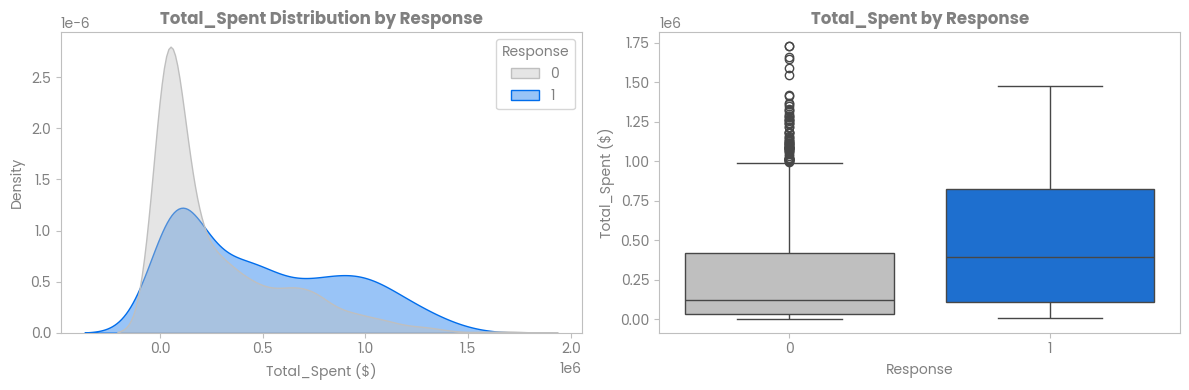

In [226]:
df_plot['Total_Spent'] = df_plot['MntFruits']+ df_plot['MntMeatProducts'] +df_plot['MntFishProducts']+df_plot['MntSweetProducts']+ df_plot['MntGoldProds']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# KDE plot
sns.kdeplot(data=df_plot, x="Total_Spent", hue="Response", common_norm=False, fill=True, alpha=0.4, ax=axes[0], palette=['#BFBFBF', '#006DEC'])
axes[0].set_title("Total_Spent Distribution by Response", fontweight='bold')
axes[0].set_xlabel("Total_Spent ($)")
axes[0].set_ylabel("Density")

# Boxplot per Response
sns.boxplot(data=df_plot, x="Response", y="Total_Spent", ax=axes[1], palette=['#BFBFBF', '#006DEC'])
axes[1].set_title("Total_Spent by Response", fontweight='bold')
axes[1].set_xlabel("Response")
axes[1].set_ylabel("Total_Spent ($)")

plt.tight_layout()
plt.show()

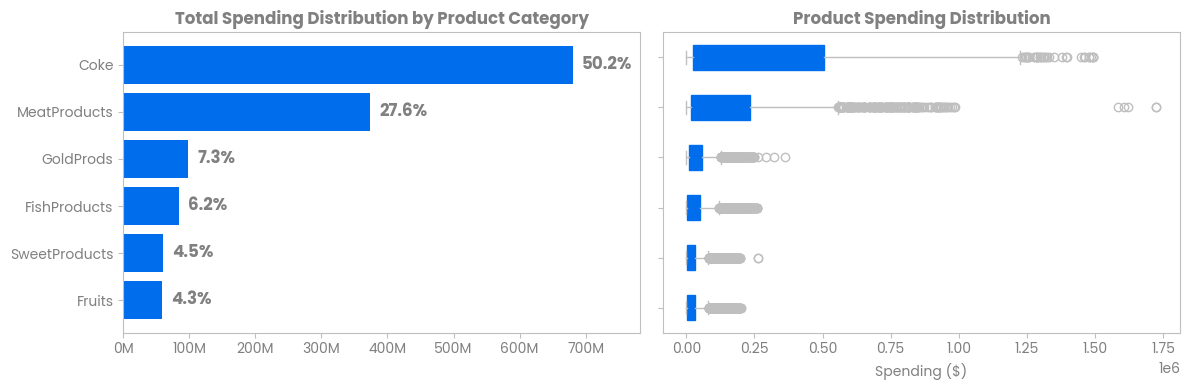

In [227]:
product_vars = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Product spending analysis
colors = cm.get_cmap("tab10", len(product_vars)).colors
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Horizontal bar chart
product_totals = df_plot[product_vars].sum().sort_values(ascending=True)
axes[0].barh(product_totals.index.str.replace("Mnt", ""), product_totals.values)
total_sum = product_totals.sum()
for i, v in enumerate(product_totals.values):
    axes[0].text(v + total_sum*0.01, i, f'{v/total_sum:.1%}', va='center', ha='left', fontsize=12, fontweight='bold')
axes[0].set_title('Total Spending Distribution by Product Category', fontweight='bold')
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x/1000_000)}M'))
axes[0].margins(x=0.15)

ordered_vars = df_plot[product_vars].sum().sort_values(ascending=True).index
df_plot[ordered_vars].boxplot(ax=axes[1], vert=False, patch_artist=True, showfliers=True, color='#006DEC', flierprops={"markeredgecolor":'#BFBFBF'}, whiskerprops={'color':'#BFBFBF'}, capprops={'color':'#BFBFBF'})
axes[1].set_yticklabels([])
axes[1].set_title('Product Spending Distribution', fontweight='bold')
axes[1].set_xlabel('Spending ($)')
axes[1].grid(False)

plt.tight_layout()
plt.show()

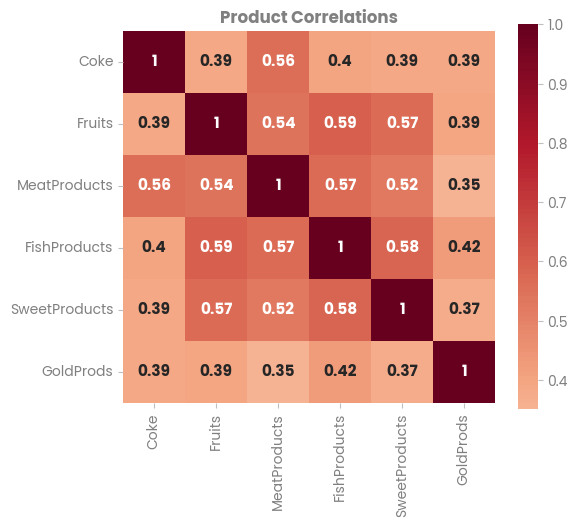

In [228]:
# Cross-selling analysis
product_corr = df_plot[product_vars].corr()
labels = [col.replace("Mnt", "") if col.startswith("Mnt") else col for col in product_corr.columns]

plt.figure(figsize=(6, 5))
sns.heatmap(product_corr, annot=True, cmap='RdBu_r', center=0, square=True, annot_kws={"fontweight": "bold", "fontsize":11}, xticklabels=labels, yticklabels=labels)
plt.title('Product Correlations', fontweight='bold')
plt.show()

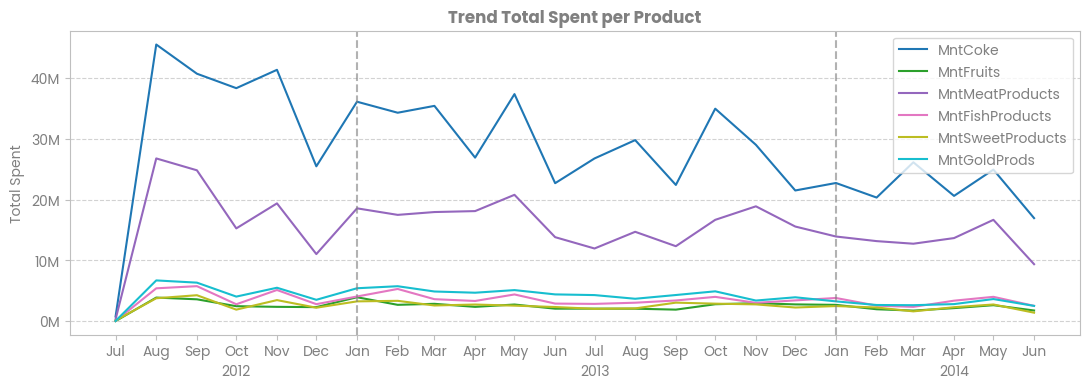

In [229]:
colors = cm.get_cmap("tab10", len(product_vars))

df_plot['YearMonth'] = df_plot['Dt_Customer'].dt.to_period('M').dt.to_timestamp()
df_trend = df_plot.groupby('YearMonth')[product_vars].sum()

fig, ax = plt.subplots(figsize=(11,4))

for i, col in enumerate(product_vars):
    ax.plot(df_trend.index, df_trend[col], label=col, color=colors(i))

months = df_trend.index.strftime("%b")
ax.set_xticks(df_trend.index)
ax.set_xticklabels(months, rotation=0, ha="center")

years = df_trend.index.to_series().dt.year
year_labels = []
year_pos = []

for y in years.unique():
    idx = df_trend.index[years == y]
    mid = idx[len(idx)//2]
    year_labels.append(str(y))
    year_pos.append(mid)

for pos, lab in zip(year_pos, year_labels):
    ax.text(pos, ax.get_ylim()[0] - (ax.get_ylim()[1]*0.1), lab, ha="center", va="top")

for i in range(1, len(df_trend.index)):
    if years.iloc[i] != years.iloc[i-1]:
        ax.axvline(df_trend.index[i], color="gray", linestyle="--", alpha=0.6)

ax.set_title("Trend Total Spent per Product", fontweight='bold')
ax.set_ylabel("Total Spent")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x/1000_000)}M'))
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## **2.3. Channel Optimization Analysis**

In [230]:
# Channel variables
channel_vars = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_names = ['Deals', 'Web', 'Catalog', 'Store']

df_plot['Total_Purchases'] = df_plot[channel_vars].sum(axis=1)

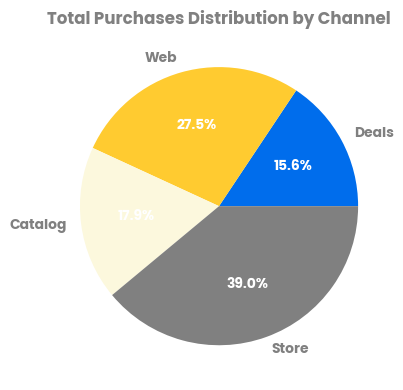

In [231]:
# Channel performance analysis
fig, ax = plt.subplots(figsize=(6, 4))

# Pie Chart
channel_totals = df_plot[channel_vars].sum()
channel_totals.index = channel_names
wedges, texts, autotexts = ax.pie(channel_totals.values, labels=channel_names, autopct='%1.1f%%', textprops={'color':'white', 'weight':'bold'})
ax.set_title('Total Purchases Distribution by Channel', fontweight='bold')
for text in texts:
    text.set_color('#808080')

plt.tight_layout()
plt.show()

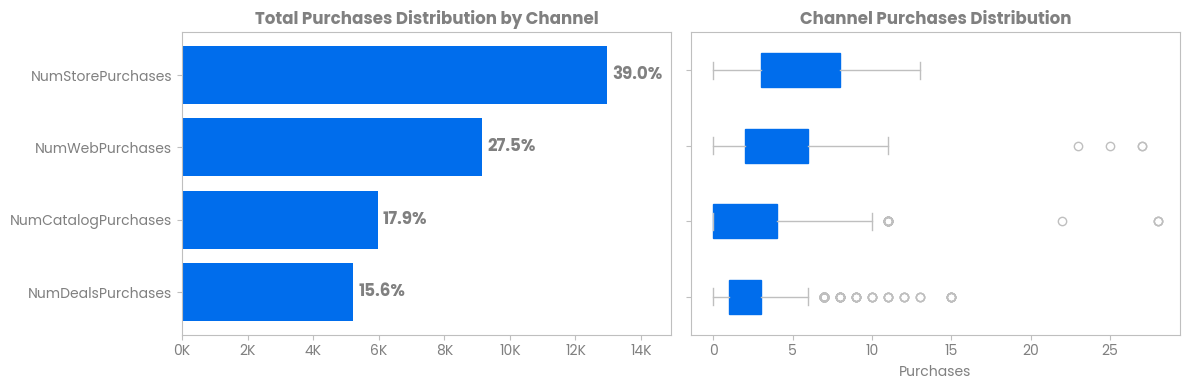

In [232]:
# Product Purchases analysis
colors = cm.get_cmap("tab10", len(channel_vars)).colors
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Horizontal bar chart
product_totals = df_plot[channel_vars].sum().sort_values(ascending=True)
axes[0].barh(product_totals.index.str.replace("Mnt", ""), product_totals.values)
total_sum = product_totals.sum()
for i, v in enumerate(product_totals.values):
    axes[0].text(v + total_sum*0.005, i, f'{v/total_sum:.1%}', va='center', ha='left', fontsize=12, fontweight='bold')
axes[0].set_title('Total Purchases Distribution by Channel', fontweight='bold')
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
axes[0].margins(x=0.15)

ordered_vars = df_plot[channel_vars].sum().sort_values(ascending=True).index
df_plot[ordered_vars].boxplot(ax=axes[1], vert=False, patch_artist=True, showfliers=True, color='#006DEC', flierprops={"markeredgecolor":'#BFBFBF'}, whiskerprops={'color':'#BFBFBF'}, capprops={'color':'#BFBFBF'})
axes[1].set_yticklabels([])
axes[1].set_title('Channel Purchases Distribution', fontweight='bold')
axes[1].set_xlabel('Purchases')
axes[1].grid(False)

plt.tight_layout()
plt.show()

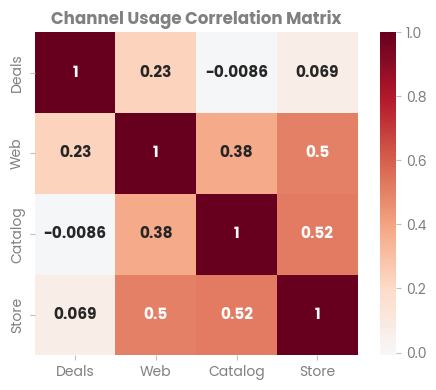

In [233]:
# Cross-channel analysis
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# Channel correlation matrix
channel_corr = df_plot[channel_vars].corr()
channel_corr.index = channel_names
channel_corr.columns = channel_names

sns.heatmap(channel_corr, annot=True, cmap='RdBu_r', center=0, square=True, ax=ax, annot_kws={"fontweight": "bold", "fontsize":11})
ax.set_title('Channel Usage Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.show()

## **2.4. Campaign Effectiveness Analysis**

In [234]:
campaign_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_plot['Total_Campaigns_Accepted'] = df_plot[campaign_vars].sum(axis=1)

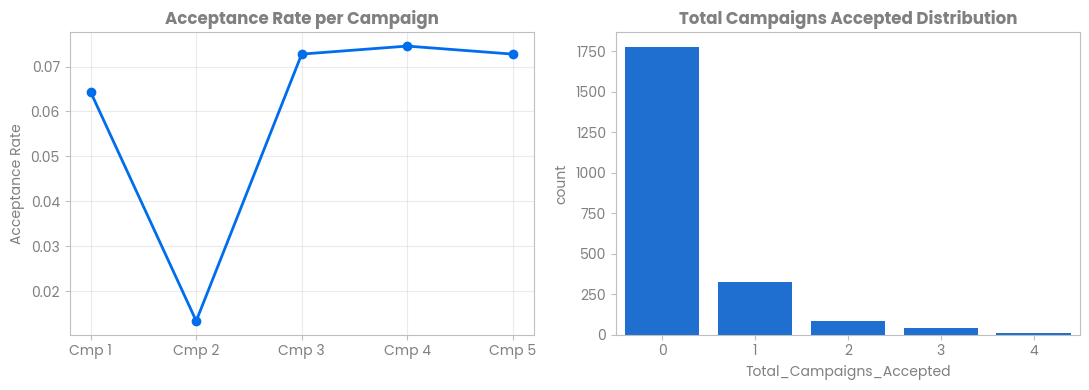

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
axes = axes.flatten()

# Line plot acceptance rate per campaign
campaign_labels = [f"Cmp {i+1}" for i in range(5)]
acceptance_rates = [df_plot[c].mean() for c in campaign_vars[:5]]
axes[0].plot(campaign_labels, acceptance_rates, marker='o', linewidth=2)
axes[0].set_title('Acceptance Rate per Campaign', fontweight='bold')
axes[0].set_ylabel('Acceptance Rate')
axes[0].grid(alpha=0.3)

# Total campaigns accepted distribution
sns.countplot(data=df_plot, x='Total_Campaigns_Accepted', ax=axes[1])
axes[1].set_title('Total Campaigns Accepted Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

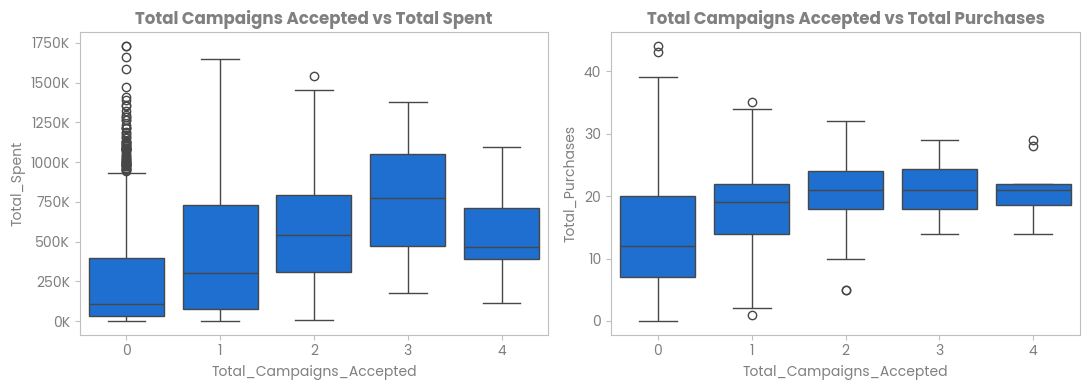

In [236]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
axes = axes.flatten()

# Total campaigns vs total spending
sns.boxplot(data=df_plot, x='Total_Campaigns_Accepted', y='Total_Spent', ax=axes[0])
axes[0].set_title('Total Campaigns Accepted vs Total Spent', fontweight='bold')
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

# Total campaigns vs total purchases
sns.boxplot(data=df_plot, x='Total_Campaigns_Accepted', y='Total_Purchases', ax=axes[1])
axes[1].set_title('Total Campaigns Accepted vs Total Purchases', fontweight='bold')

plt.tight_layout()
plt.show()

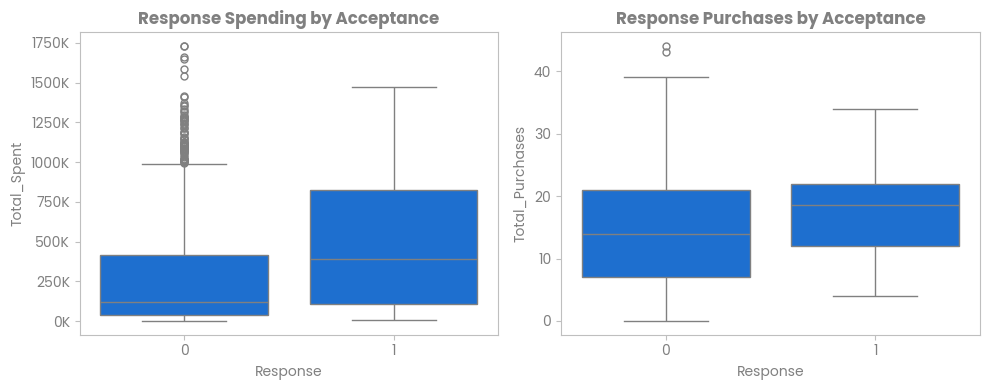

In [237]:
# Campaign effectiveness analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

sns.boxplot(data=df_plot, x='Response', y='Total_Spent', ax=axes[0], **gray_props)
axes[0].set_title(f'Response Spending by Acceptance', fontweight='bold')
axes[0].set_xlabel('Response')
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

sns.boxplot(data=df_plot, x='Response', y='Total_Purchases', ax=axes[1], **gray_props)
axes[1].set_title(f'Response Purchases by Acceptance', fontweight='bold')
axes[1].set_xlabel('Response')

plt.tight_layout()
plt.show()

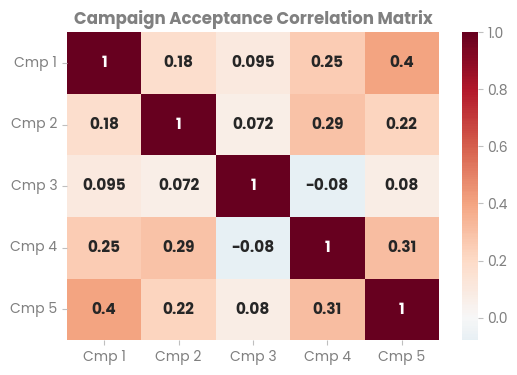

In [238]:
# Heatmap
campaign_labels = [f"Cmp {i+1}" for i in range(len(campaign_vars))]
df_temp = df_plot[campaign_vars].copy()
df_temp.columns = campaign_labels
campaign_corr = df_temp.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(campaign_corr, annot=True, cmap='RdBu_r', center=0, annot_kws={"fontweight": "bold", "fontsize": 11})
plt.title('Campaign Acceptance Correlation Matrix', fontweight='bold')
plt.yticks(rotation=0)
plt.show()

## **2.5. Conversion Rate Analysis**

In [239]:
total_customers = len(df_plot)
responded_customers = df_plot["Response"].sum()
conversion_rate_campaign = responded_customers / total_customers
print("Conversion rate campaign:", conversion_rate_campaign)

Conversion rate campaign: 0.14910714285714285


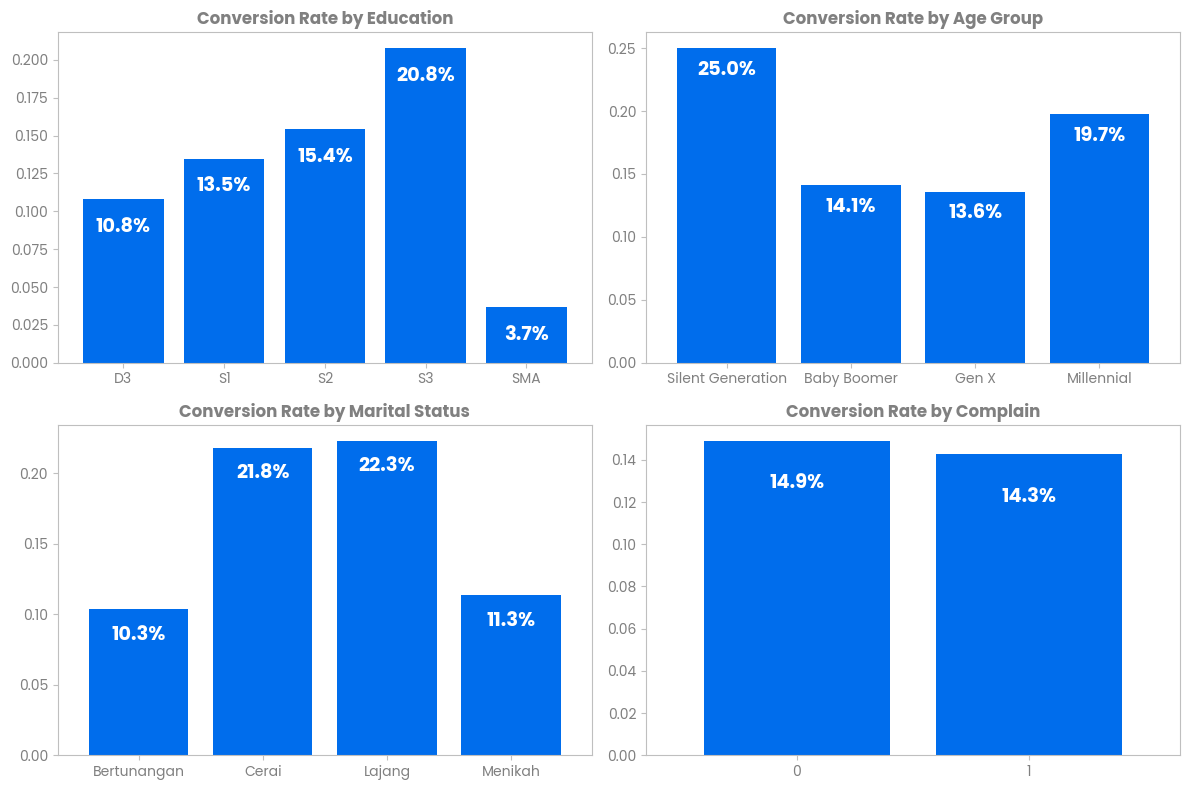

In [240]:
def conv_rate(group):
    total = len(group)
    responded = group["Response"].sum()
    return responded / total if total > 0 else 0

conv_dict = {
    "Education": df_plot.groupby("Education").apply(conv_rate),
    "Age Group": df_plot.groupby("Age_Group").apply(conv_rate),
    "Marital Status": df_plot.groupby("Marital_Status").apply(conv_rate),
    "Complain": df_plot.groupby("Complain").apply(conv_rate)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, (title, conv) in zip(axes.flatten(), conv_dict.items()):
    bars = conv.plot(kind="bar", ax=ax, width=0.8)
    ax.set_title(f"Conversion Rate by {title}", fontweight='bold')
    ax.set_ylabel("")
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=0)

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height-0.025, f'{height*100:.1f}%', ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

In [241]:
df_plot["PastAccepted"] = df_plot[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]].sum(axis=1)
df_plot["ConversionRate_History"] = df_plot["PastAccepted"] / 5

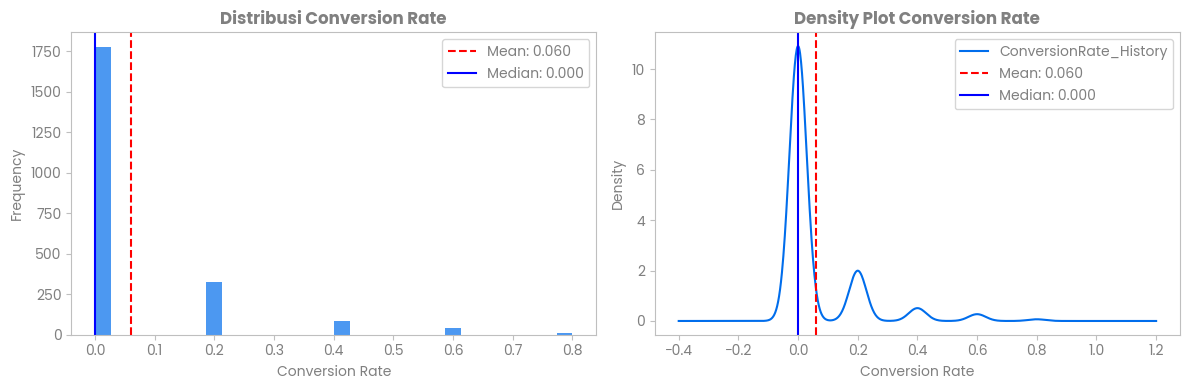

In [242]:
# Distribusi conversion rate per customer
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

mean_val = df_plot['ConversionRate_History'].mean()
median_val = df_plot['ConversionRate_History'].median()

axes[0].hist(df_plot['ConversionRate_History'], bins=30, alpha=0.7, edgecolor=None)
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.3f}')
axes[0].axvline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.3f}')
axes[0].set_title('Distribusi Conversion Rate', fontweight='bold')
axes[0].set_xlabel('Conversion Rate')
axes[0].set_ylabel('Frequency')
axes[0].legend()

df_plot['ConversionRate_History'].plot(kind='density', ax=axes[1])
axes[1].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.3f}')
axes[1].axvline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.3f}')
axes[1].set_title('Density Plot Conversion Rate', fontweight='bold')
axes[1].set_xlabel('Conversion Rate')
axes[1].legend()

plt.tight_layout()
plt.show()

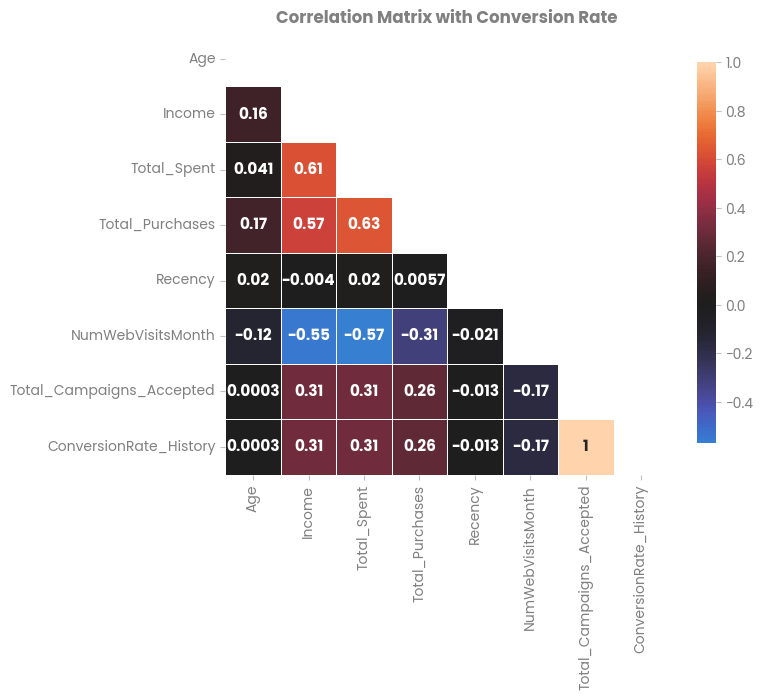

In [243]:
# Correlation with numerical variables
numeric_cols = ['Age', 'Income', 'Total_Spent', 'Total_Purchases', 'Recency',
                'NumWebVisitsMonth', 'Total_Campaigns_Accepted']

# Compute correlations with ConversionRate_History
correlations = df_plot[numeric_cols + ['ConversionRate_History']].corr()['ConversionRate_History'].sort_values(ascending=False)

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 7))
correlation_matrix = df_plot[numeric_cols + ['ConversionRate_History']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"fontweight": "bold", "fontsize": 11}
)

plt.title('Correlation Matrix with Conversion Rate', fontweight='bold')
plt.tight_layout()
plt.show()

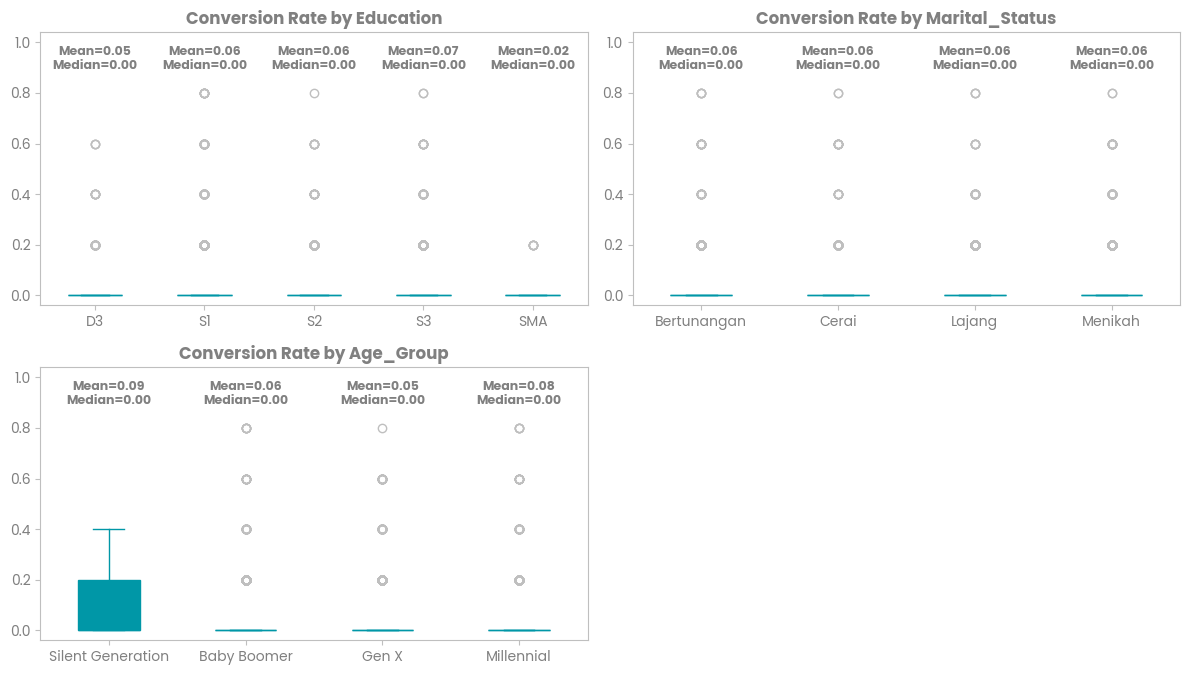

In [244]:
# Analysis based on demographic categories
categorical_cols = ['Education', 'Marital_Status', 'Age_Group']

ncols = 2
nrows = (len(categorical_cols) + 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3.5 * nrows))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    df_plot.boxplot(
        column='ConversionRate_History',
        by=col,
        ax=ax,
        color='#0097A7',
        patch_artist=True,
        flierprops={'markeredgecolor': '#BFBFBF'}
    )
    ax.set_title(f'Conversion Rate by {col}', fontweight='bold')
    ax.set_xlabel('')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

    # Calculate summary statistics
    stats = df_plot.groupby(col)['ConversionRate_History'].agg(['mean', 'median', 'max'])

    global_max = stats['max'].max()
    ax.set_ylim(top=global_max * 1.3)
    ax.grid(False)

    # Annotate mean and median for each category
    for j, cat in enumerate(stats.index):
        mean_val = stats.loc[cat, 'mean']
        median_val = stats.loc[cat, 'median']

        ax.annotate(
            f"Mean={mean_val:.2f}\nMedian={median_val:.2f}",
            xy=(j+1, global_max),
            xytext=(0, 15),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontweight='bold',
            fontsize=9,
            color="#808080"
        )

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("")
plt.tight_layout()
plt.show()

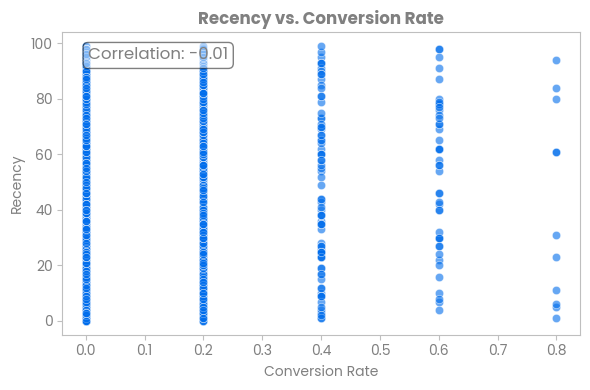

In [245]:
# Calculate correlation
corr, _ = pearsonr(df_plot['ConversionRate_History'], df_plot['Recency'])

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_plot, x='ConversionRate_History', y='Recency', alpha=0.6)

# Display correlation value
plt.text(
    0.05, 0.95,
    f'Correlation: {corr:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5)
)

plt.title('Recency vs. Conversion Rate', fontweight='bold')
plt.xlabel('Conversion Rate')
plt.ylabel('Recency')
plt.tight_layout()
plt.show()

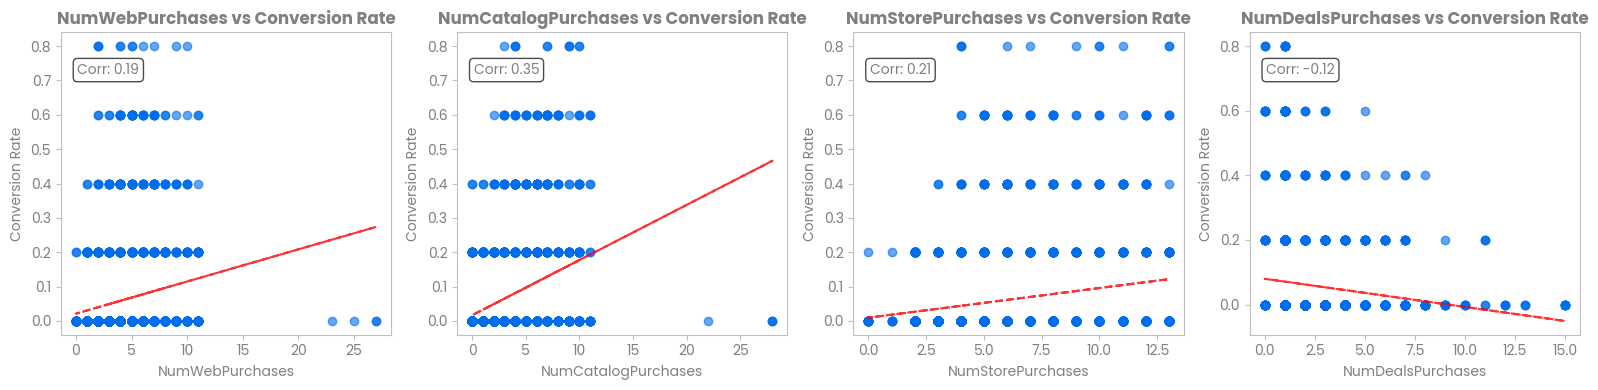

In [246]:
channel_data = df_plot[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'ConversionRate_History']]
channel_corr = channel_data.corr()['ConversionRate_History'].drop('ConversionRate_History').sort_values(ascending=False)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

for i, col in enumerate(purchase_cols):
    ax = axes[i]
    ax.scatter(df_plot[col], df_plot['ConversionRate_History'], alpha=0.6)
    ax.set_xlabel(col)
    ax.set_ylabel('Conversion Rate')
    ax.set_title(f'{col} vs Conversion Rate', fontweight='bold')

    # Fit linear trend line
    z = np.polyfit(df_plot[col], df_plot['ConversionRate_History'], 1)
    p = np.poly1d(z)
    ax.plot(df_plot[col], p(df_plot[col]), "r--", alpha=0.8)

    # Correlation
    corr_value = channel_data[col].corr(channel_data['ConversionRate_History'])
    ax.text(0.05, 0.9, f'Corr: {corr_value:.2f}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# **3. Data Preparation**

## **3.1. Handling Missing Data**

In [247]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [248]:
# Median imputation for each numerical column
df = df.fillna(df.median(numeric_only=True))

## **3.2. Handling Duplicates**

In [249]:
# Count the number of duplicated rows in the dataframe
df.duplicated().sum()

np.int64(0)

## **3.3. Feature Extraction**

In [250]:
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())

Unique values in Education column: ['S1' 'S3' 'S2' 'SMA' 'D3']
Unique values in Marital_Status column: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']


In [251]:
def education_level(education):
    if education in ['D3', 'S1', 'S2', 'S3']:
        return 'Graduate'
    else:
        return 'Undergraduate'

In [252]:
def living_status(marital_status):
    if marital_status in ['Cerai', 'Janda', 'Duda']:
        return 'Cerai'
    elif marital_status == 'Menikah':
        return 'Menikah'
    elif marital_status == 'Lanjang':
        return 'Lajang'

In [253]:
# Convert customer join date to datetime and calculate age based on the most recent year
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
ref_year = df["Dt_Customer"].dt.year.max()
df["Age"] = ref_year - df["Year_Birth"]

# Recode education and marital status, and create a flag for customers with children/teenagers
df['Education'] = df['Education'].apply(education_level)
df['Marital_Status'] = df['Marital_Status'].apply(living_status)
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

# Aggregate campaign responses, spending behavior, and total amount spent
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df['Average_Spend'] = np.where(
    df['NumDealsPurchases'] > 0,
    (df[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases'],
    0
)
df['Total_Spent'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Online engagement features: average monthly website visits and share of purchases made online
df['Avg_Web_Visits'] = df['NumWebVisitsMonth'] / 12
df['Online_Purchase_Ratio'] = np.where(
    (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']) > 0,
    df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']),
    0
)

In [254]:
# Preserve a copy of the original dataset before scaling and encoding
df_ori = df.copy()

## **3.4. Feature Selection**

In [255]:
# Drop unnecessary identifier and metadata columns
to_drop = ['Unnamed: 0', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

## **3.5. Feature Encoding**

In [256]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["Marital_Status", "Education"])

## **3.6. Feature Scaling**

In [257]:
# Scale numerical features using RobustScaler to reduce the impact of outliers
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Spent', 'Avg_Web_Visits', 'Online_Purchase_Ratio', 'Age', 'Total_Campaigns_Accepted']

scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# **4. Customer Segmentation**

## **4.1. PCA**

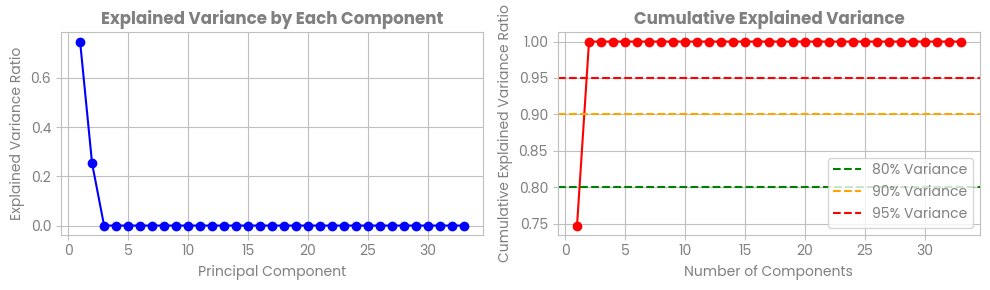

Number of components for 90% variance: 2


In [258]:
# PCA with all components for analysis
pca_full = PCA()
X_pca_full = pca_full.fit_transform(df)

# Explained Variance Ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot Explained Variance
plt.figure(figsize=(10, 3))

# Subplot 1: Individual explained variance
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Explained Variance by Each Component', fontweight='bold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Subplot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Variance')
plt.axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance', fontweight='bold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('pca.png', transparent=True, dpi=750)
plt.show()

# Find the number of components to explain 90% variance
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(f"Number of components for 90% variance: {n_components_90}")

In [259]:
# Initialize the PCA model
pca = PCA(n_components=2)

# Fit and transform the data
df_pca = pca.fit_transform(df)

## **4.2. Clustering**

### **4.2.1. K-Means**

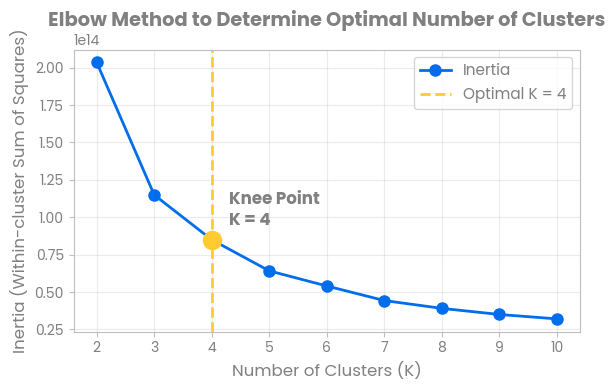

In [260]:
# Elbow Method with automatic knee point detection
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

# Automatically detect the knee point
knee_locator = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Visualization
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, color='#006dec', marker='o', linewidth=2, markersize=8, label='Inertia')

# Highlight the knee point
if optimal_k:
    plt.axvline(x=optimal_k, color='#ffcb30', linestyle='--', linewidth=2, label=f'Optimal K = {optimal_k}')
    plt.plot(optimal_k, inertias[optimal_k-2], marker='o', markersize=12, markerfacecolor='#ffcb30', markeredgecolor='#ffcb30', markeredgewidth=2)
    plt.annotate(
        f'Knee Point\nK = {optimal_k}', xy=(optimal_k, inertias[optimal_k-2]),
        xytext=(optimal_k+0.3, inertias[optimal_k-2] + max(inertias)*0.05),
        fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='none', alpha=0.7, edgecolor='none')
    )

plt.title('Elbow Method to Determine Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [261]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

pred_kmeans = kmeans.predict(df_pca)

In [262]:
silhouette_score_value = silhouette_score(df_pca, pred_kmeans)
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, pred_kmeans)
davies_bouldin_score_value = davies_bouldin_score(df_pca, pred_kmeans)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.5755742825478758
Calinski-Harabasz Score: 3449.0885758954137
Davies-Bouldin Score: 0.7274389116991484


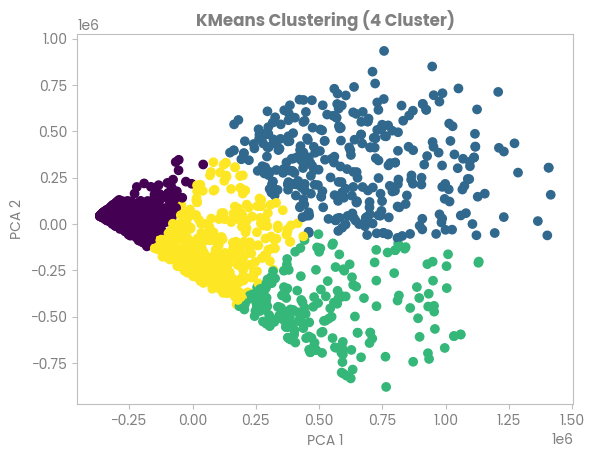

In [263]:
# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_kmeans, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering (4 Cluster)', fontweight='bold')
plt.show()

### **4.2.2. Agglomerative Clustering**

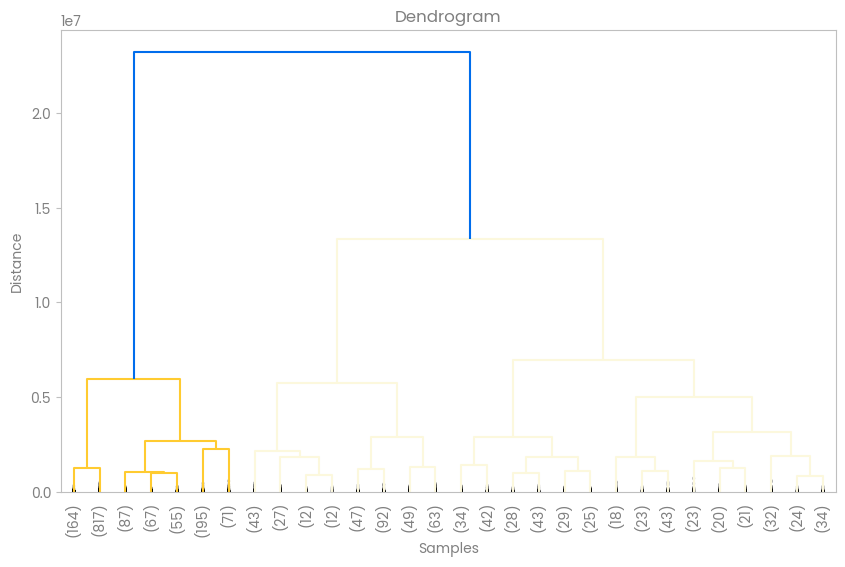

Clusters: 2, Silhouette Score: 0.595
Clusters: 3, Silhouette Score: 0.625
Clusters: 4, Silhouette Score: 0.597
Clusters: 5, Silhouette Score: 0.506
Clusters: 6, Silhouette Score: 0.510
Clusters: 7, Silhouette Score: 0.518
Clusters: 8, Silhouette Score: 0.518
Clusters: 9, Silhouette Score: 0.496


In [264]:
# Plot dendrogram
linked = linkage(df_pca, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

range_n_clusters = range(2, 10)
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_pca)
    score = silhouette_score(df_pca, preds)
    print(f"Clusters: {n_clusters}, Silhouette Score: {score:.3f}")

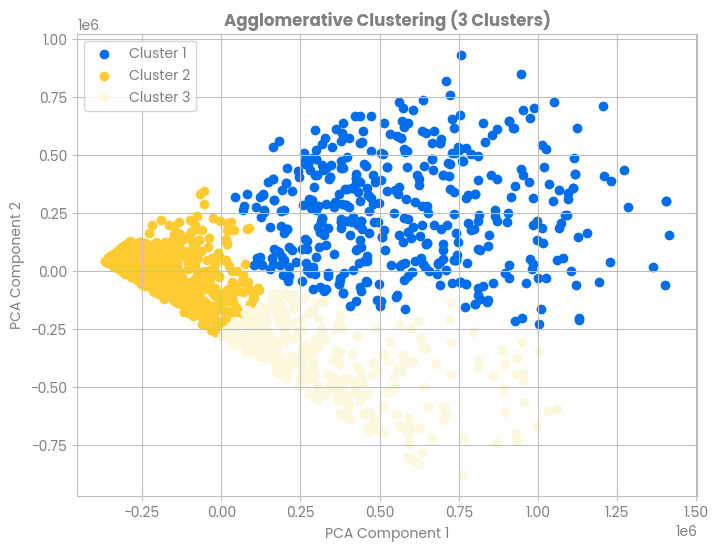

In [265]:
# Apply Agglomerative Clustering and visualize the results
model = AgglomerativeClustering(n_clusters=3)
pred_agg = model.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(df_pca[pred_agg == cluster, 0], df_pca[pred_agg == cluster, 1], label=f'Cluster {cluster + 1}')

plt.title('Agglomerative Clustering (3 Clusters)', fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

### **4.2.3. DBSCAN**

Optimal eps value according to KneeLocator: 71568.149


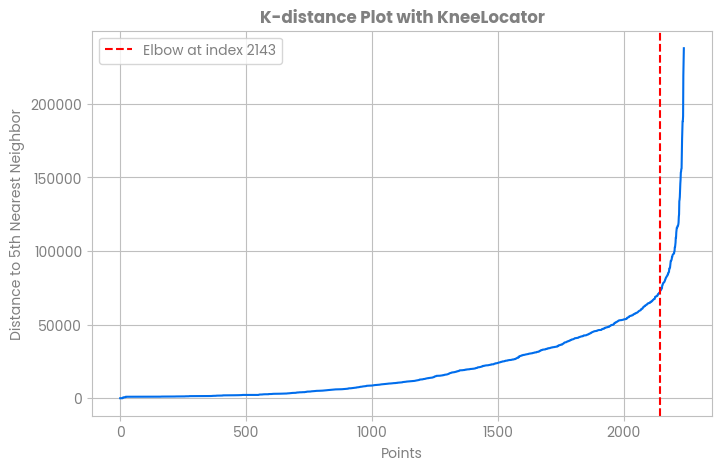

In [266]:
# Determine the optimal eps value for DBSCAN using the k-distance plot and KneeLocator
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Sort distances to the 5th nearest neighbor
distances = np.sort(distances[:, 4])

# Identify the knee (elbow) point as optimal eps
knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
eps_value = distances[knee.knee]

print(f"Optimal eps value according to KneeLocator: {eps_value:.3f}")

# Plot k-distance curve with the knee point
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.axvline(x=knee.knee, color='r', linestyle='--', label=f'Elbow at index {knee.knee}')
plt.title('K-distance Plot with KneeLocator', fontweight='bold')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.legend()
plt.grid(True)
plt.show()

In [267]:
# Apply DBSCAN clustering with the chosen eps value and inspect the cluster labels
model = DBSCAN(eps=71568.170, min_samples=5)
pred_dbs = model.fit_predict(df_pca)

unique_labels = set(pred_dbs)
print(f"Number of clusters (including noise): {len(unique_labels)}")
print(f"Unique labels: {unique_labels}")

Number of clusters (including noise): 6
Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(-1)}


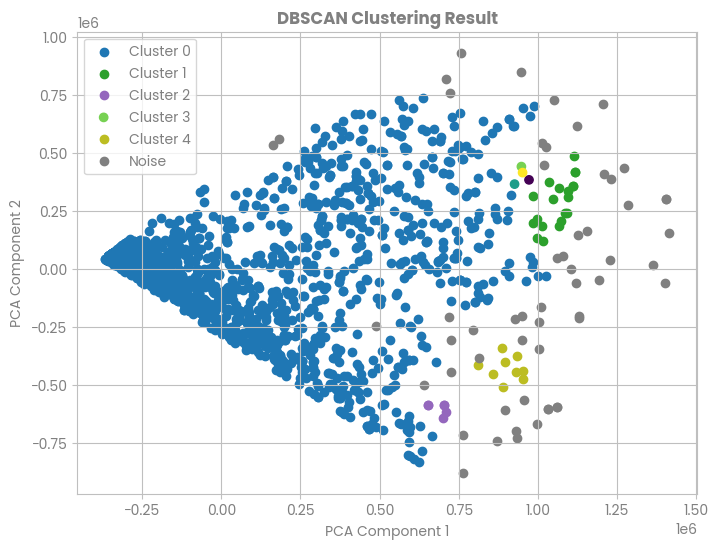

In [268]:
# Visualize DBSCAN clustering results on PCA-transformed features
plt.figure(figsize=(8, 6))
unique_labels = set(pred_dbs)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    if label == -1:
        color = 'gray'
        label_name = 'Noise'
    else:
        color = colors(label)
        label_name = f'Cluster {label}'

    plt.scatter(df_pca[pred_dbs == label, 0], df_pca[pred_dbs == label, 1],
                c=color, label=label_name)

plt.title('DBSCAN Clustering Result', fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [269]:
# Evaluate DBSCAN clustering performance (excluding noise points)
mask = pred_dbs != -1
X_clustered = df_pca[mask]
labels_clustered = pred_dbs[mask]

n_cluster = len(set(labels_clustered))
n_noise = np.sum(pred_dbs == -1)

# Compute evaluation metrics only if more than one cluster is formed
if n_cluster > 1:
    sil_score = silhouette_score(X_clustered, labels_clustered)
    db_score = davies_bouldin_score(X_clustered, labels_clustered)
else:
    sil_score = None
    db_score = None

print(f"Number of clusters (excluding noise): {n_cluster}")
print(f"Number of noise points: {n_noise}")
if sil_score is not None:
    print(f"Silhouette Score: {sil_score:.3f}")
    print(f"Davies-Bouldin Index: {db_score:.3f}")
else:
    print("Not enough clusters to compute evaluation metrics.")

Number of clusters (excluding noise): 5
Number of noise points: 56
Silhouette Score: 0.403
Davies-Bouldin Index: 0.566


### **4.2.4. GMM**

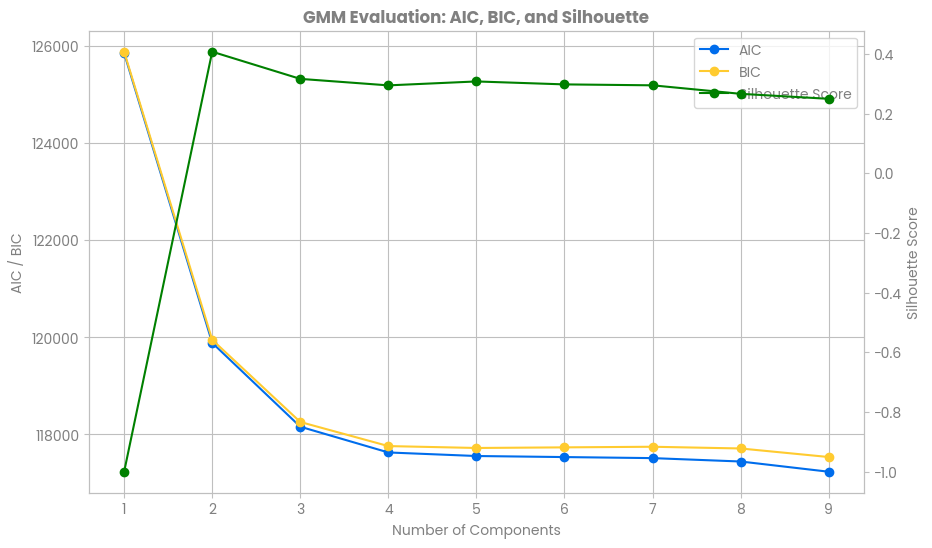

In [270]:
# Evaluate Gaussian Mixture Models (GMM) with varying number of components
n_range = range(1, 10)
aic_scores = []
bic_scores = []
sil_scores = []

for n in n_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(df_pca)

    aic_scores.append(gmm.aic(df_pca))
    bic_scores.append(gmm.bic(df_pca))

    # Compute silhouette score only if more than one cluster is formed
    if len(set(labels)) > 1:
        sil_scores.append(silhouette_score(df_pca, labels))
    else:
        sil_scores.append(-1)

# Plot evaluation metrics with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# AIC & BIC on the left y-axis
ax1.plot(n_range, aic_scores, label='AIC', marker='o')
ax1.plot(n_range, bic_scores, label='BIC', marker='o')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('AIC / BIC')
ax1.grid(True)

# Silhouette Score on the right y-axis
ax2 = ax1.twinx()
ax2.plot(n_range, sil_scores, label='Silhouette Score', marker='o', color='green')
ax2.set_ylabel('Silhouette Score')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.title('GMM Evaluation: AIC, BIC, and Silhouette', fontweight='bold')
plt.show()

In [271]:
# Initialize and fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
pred_gmm = gmm.fit_predict(df_pca)

# Compute evaluation metrics
sil_score = silhouette_score(df_pca, pred_gmm)
db_score = davies_bouldin_score(df_pca, pred_gmm)

# Display results
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")
print(f"Number of Components: {len(set(pred_gmm))}")

Silhouette Score: 0.407
Davies-Bouldin Index: 0.823
Number of Components: 2


### **4.2.5. Final Model**

In [272]:
results = {
    "K-Means": {
        "Silhouette": silhouette_score_value,
        "Calinski-Harabasz": calinski_harabasz_score_value,
        "Davies-Bouldin": davies_bouldin_score_value
    },
    "Agglomerative": {
        "Silhouette": silhouette_score(df_pca, pred_agg),
        "Calinski-Harabasz": calinski_harabasz_score(df_pca, pred_agg),
        "Davies-Bouldin": davies_bouldin_score(df_pca, pred_agg)
    },
    "DBSCAN": {
        "Silhouette": sil_score if sil_score is not None else None,
        "Calinski-Harabasz": calinski_harabasz_score(X_clustered, labels_clustered) if n_cluster > 1 else None,
        "Davies-Bouldin": db_score if db_score is not None else None
    },
    "GMM": {
        "Silhouette": sil_score,
        "Calinski-Harabasz": calinski_harabasz_score(df_pca, pred_gmm),
        "Davies-Bouldin": db_score
    }
}

df_scores = pd.DataFrame(results).T
print(df_scores)

               Silhouette  Calinski-Harabasz  Davies-Bouldin
K-Means             0.576           3449.089           0.727
Agglomerative       0.625           3347.925           0.766
DBSCAN              0.407             67.941           0.823
GMM                 0.407           1501.946           0.823


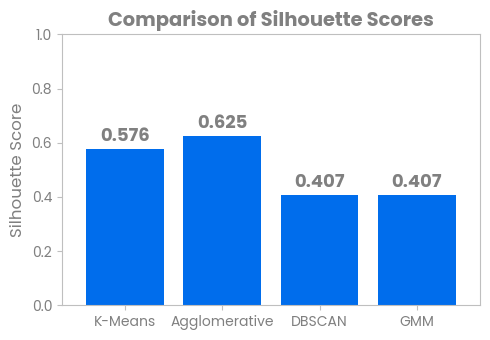

In [273]:
silhouette_scores = df_scores["Silhouette"]

plt.figure(figsize=(5, 3.5))
silhouette_scores.plot(kind='bar', width=0.8)

plt.title("Comparison of Silhouette Scores", fontsize=14, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylim(0, 1)
plt.grid(False)

for i, v in enumerate(silhouette_scores):
    plt.text(i, v + 0.03, f"{v:.3f}", ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('ss.png', transparent=True, dpi=750)
plt.show()

Based on the evaluation, K-Means was selected as the final model. While Agglomerative Clustering showed slightly stronger performance on certain metrics, K-Means provides significant advantages in computational efficiency, scalability, and interpretability, making it the most practical choice for real-world applications.

In [274]:
final_kmeans = KMeans(n_clusters=4)
final_kmeans.fit(df_pca)

final_labels = final_kmeans.predict(df_pca)

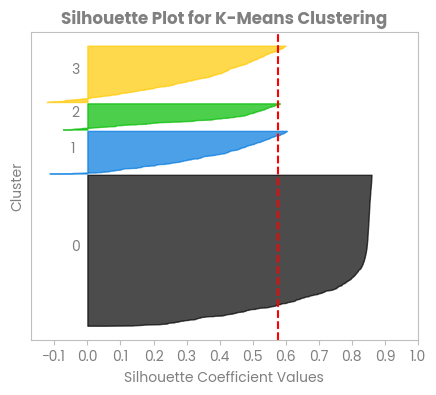

In [275]:
sample_silhouette_values = silhouette_samples(df_pca, pred_kmeans)
n_clusters = len(np.unique(pred_kmeans))

fig, ax = plt.subplots(figsize=(5, 4))
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[pred_kmeans == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7
    )

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

sil_avg = silhouette_score(df_pca, pred_kmeans)
ax.axvline(x=sil_avg, color="red", linestyle="--")

ax.set_title("Silhouette Plot for K-Means Clustering", fontweight='bold')
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster")

ax.set_yticks([])
ax.set_xticks(np.linspace(-0.1, 1, 12))

plt.savefig('ss.png', transparent=True, dpi=750)
plt.show()

# **5. Customer Segmentation Analysis**

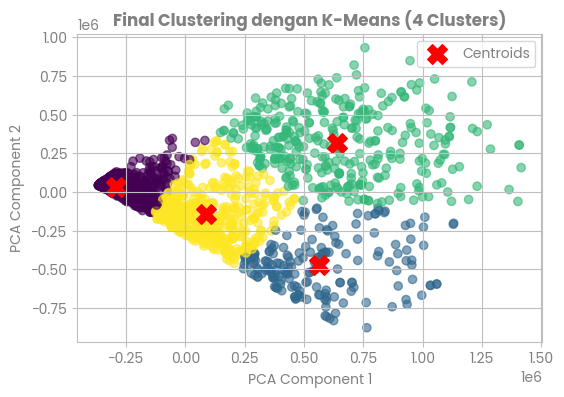

In [276]:
# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=final_labels, cmap='viridis', alpha=0.6)
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Final Clustering dengan K-Means (4 Clusters)', fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [277]:
# Cluster size
df_ori['Cluster'] = final_labels
print(df_ori['Cluster'].value_counts())

Cluster
0    1251
3     463
2     345
1     181
Name: count, dtype: int64


In [278]:
demographic_cols = ["ID", "Year_Birth", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Dt_Customer"]
purchase_behavior_cols = ["Recency", "MntCoke", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
campaign_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "Complain"]

In [279]:
# Identify significant features for clustering using statistical tests
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Campaigns_Accepted', 'Average_Spend', 'Total_Spent', 'Avg_Web_Visits', 'Online_Purchase_Ratio']
cat_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Is_Parent']

signif_features = {}

# ANOVA test for numerical features
for col in num_cols:
    groups = [df_ori[df_ori['Cluster'] == c][col].dropna() for c in df_ori['Cluster'].unique()]
    stat, p = f_oneway(*groups)
    signif_features[col] = p

# Chi-square test for categorical features
for col in cat_cols:
    contingency = pd.crosstab(df_ori[col], df_ori['Cluster'])
    chi2, p, dof, exp = chi2_contingency(contingency)
    signif_features[col] = p

# Collect results in a DataFrame
sig_df_ori = pd.DataFrame.from_dict(signif_features, orient='index', columns=['p_value'])
sig_df_ori['significant'] = sig_df_ori['p_value'] < 0.05
display(sig_df_ori)

,p_value,significant
Income,6.729e-249,True
Kidhome,2.081e-185,True
Teenhome,1.634e-82,True
Recency,7.791e-01,False
MntCoke,0.000e+00,True
MntFruits,2.863e-194,True
MntMeatProducts,0.000e+00,True
MntFishProducts,4.918e-241,True
MntSweetProducts,2.038e-181,True
MntGoldProds,1.431e-129,True


In [280]:
# Summary statistics for each cluster (mean values of numerical features)
cluster_summary = df_ori.groupby('Cluster').mean(numeric_only=True)
display(cluster_summary)

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Is_Parent,Total_Campaigns_Accepted,Average_Spend,Total_Spent,Avg_Web_Visits,Online_Purchase_Ratio
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1126.305,5606.545,1970.579,3.864e+07,0.711,0.503,48.860,6.341e+04,8941.647,45494.804,12228.617,9206.235,21988.010,2.333,2.665,0.892,3.710,6.266,0.066,0.017,0.003,0.004,0.004,0.012,3.0,11.0,0.098,43.421,0.870,0.094,43245.150,97859.313,0.522,0.345
1,1083.232,5584.630,1964.442,7.239e+07,0.110,0.547,49.265,1.038e+06,36508.287,280922.652,49806.630,37458.564,65430.939,2.486,6.110,5.365,8.541,5.166,0.122,0.370,0.337,0.210,0.105,0.000,3.0,11.0,0.365,49.558,0.586,1.144,231562.996,470127.072,0.430,0.299
2,1094.267,5552.226,1969.110,7.672e+07,0.012,0.087,50.565,5.730e+05,72704.348,538944.928,108539.130,73017.391,82220.290,1.009,4.933,6.067,8.510,2.452,0.067,0.075,0.232,0.220,0.009,0.003,3.0,11.0,0.281,44.890,0.090,0.603,870197.101,875426.087,0.204,0.255
3,1134.093,5585.991,1965.495,6.286e+07,0.177,0.812,48.637,4.663e+05,34643.629,173371.490,48159.827,37004.320,66723.542,3.222,6.497,3.851,8.309,4.944,0.076,0.114,0.039,0.054,0.006,0.011,3.0,11.0,0.104,48.505,0.814,0.289,160346.097,359902.808,0.412,0.352


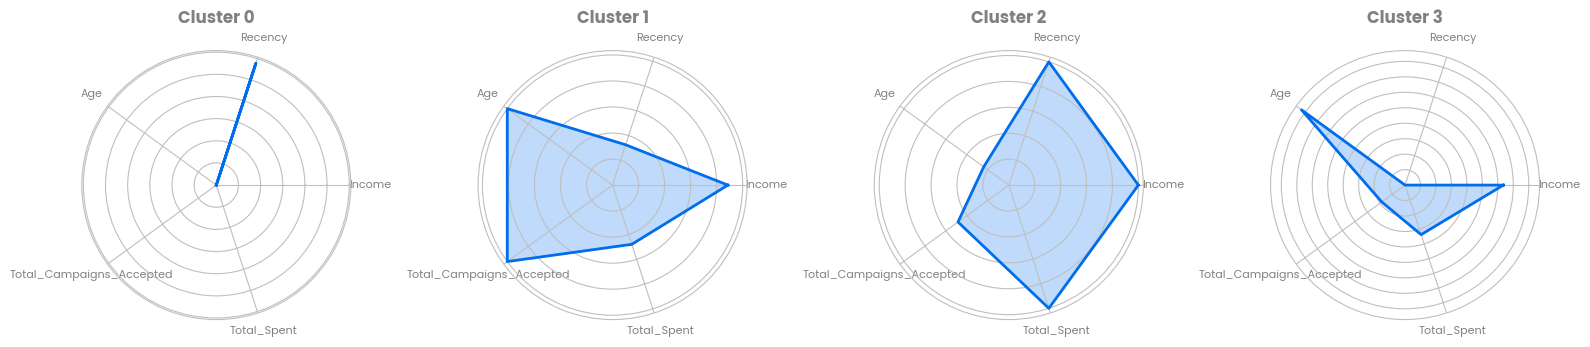

In [281]:
# Features
features = ['Income', 'Recency', 'Age', 'Total_Campaigns_Accepted', 'Total_Spent']

# Compute cluster means
cluster_data = df_ori.groupby('Cluster')[features].mean()

# Normalize 0-1
scaler = MinMaxScaler()
cluster_data_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_data),
    columns=cluster_data.columns,
    index=cluster_data.index
)

# Radar chart setup
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Create subplots in a single row
fig, axes = plt.subplots(1, len(cluster_data_scaled), figsize=(4 * len(cluster_data_scaled), 4), subplot_kw=dict(polar=True))

if len(cluster_data_scaled) == 1:
    axes = [axes]

for ax, (cluster_id, row) in zip(axes, cluster_data_scaled.iterrows()):
    values = row[features].tolist()
    values += values[:1]

    ax.plot(angles, values, color='#006dec', linewidth=2)
    ax.fill(angles, values, alpha=0.25, color='#006dec')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=8)

    ax.set_yticklabels([])
    ax.set_title(f'Cluster {cluster_id}', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

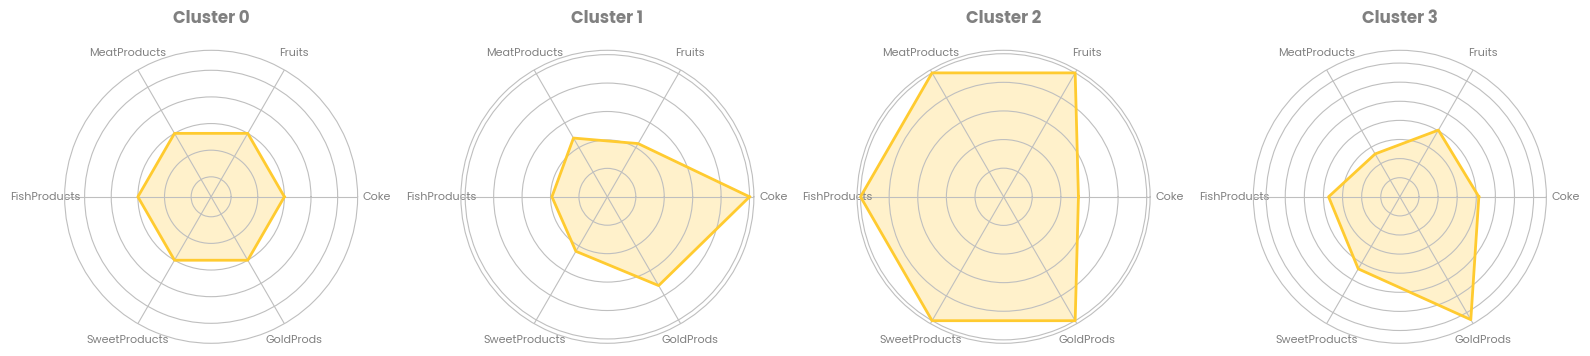

In [282]:
# Features
features = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
labels = [f[3:] if f.startswith('Mnt') else f for f in features]  # Remove 'Mnt' prefix

# Compute cluster means
cluster_data = df_ori.groupby('Cluster')[features].mean()

# Normalize 0-1
scaler = MinMaxScaler()
cluster_data_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_data),
    columns=cluster_data.columns,
    index=cluster_data.index
)

# Radar chart setup
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Create subplots in a single row
fig, axes = plt.subplots(1, len(cluster_data_scaled), figsize=(4 * len(cluster_data_scaled), 4), subplot_kw=dict(polar=True))

if len(cluster_data_scaled) == 1:
    axes = [axes]

for ax, (cluster_id, row) in zip(axes, cluster_data_scaled.iterrows()):
    values = np.append(row[features].values, row[features].values[0])

    ax.plot(angles, values, color='#ffcb30', linewidth=2)
    ax.fill(angles, values, alpha=0.25, color='#ffcb30')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.set_yticklabels([])  # Hide y-axis ticks
    ax.set_title(f'Cluster {cluster_id}', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()